In [1]:
from PIL import Image
from pathlib import Path
import pytesseract
import pandas as pd

In [2]:
help(pytesseract.image_to_data)

Help on function image_to_data in module pytesseract.pytesseract:

image_to_data(image, lang=None, config='', nice=0, output_type='string', timeout=0, pandas_config=None)
    Returns string containing box boundaries, confidences,
    and other information. Requires Tesseract 3.05+



Admittedly, this `help` doc string is not the most helpful one. Instead, one can go to the directory indicated in the next cell to read the Python scripts.

In [3]:
pytesseract.__path__

['/home/phunc20/.config/miniconda3/envs/oft/lib/python3.8/site-packages/pytesseract']

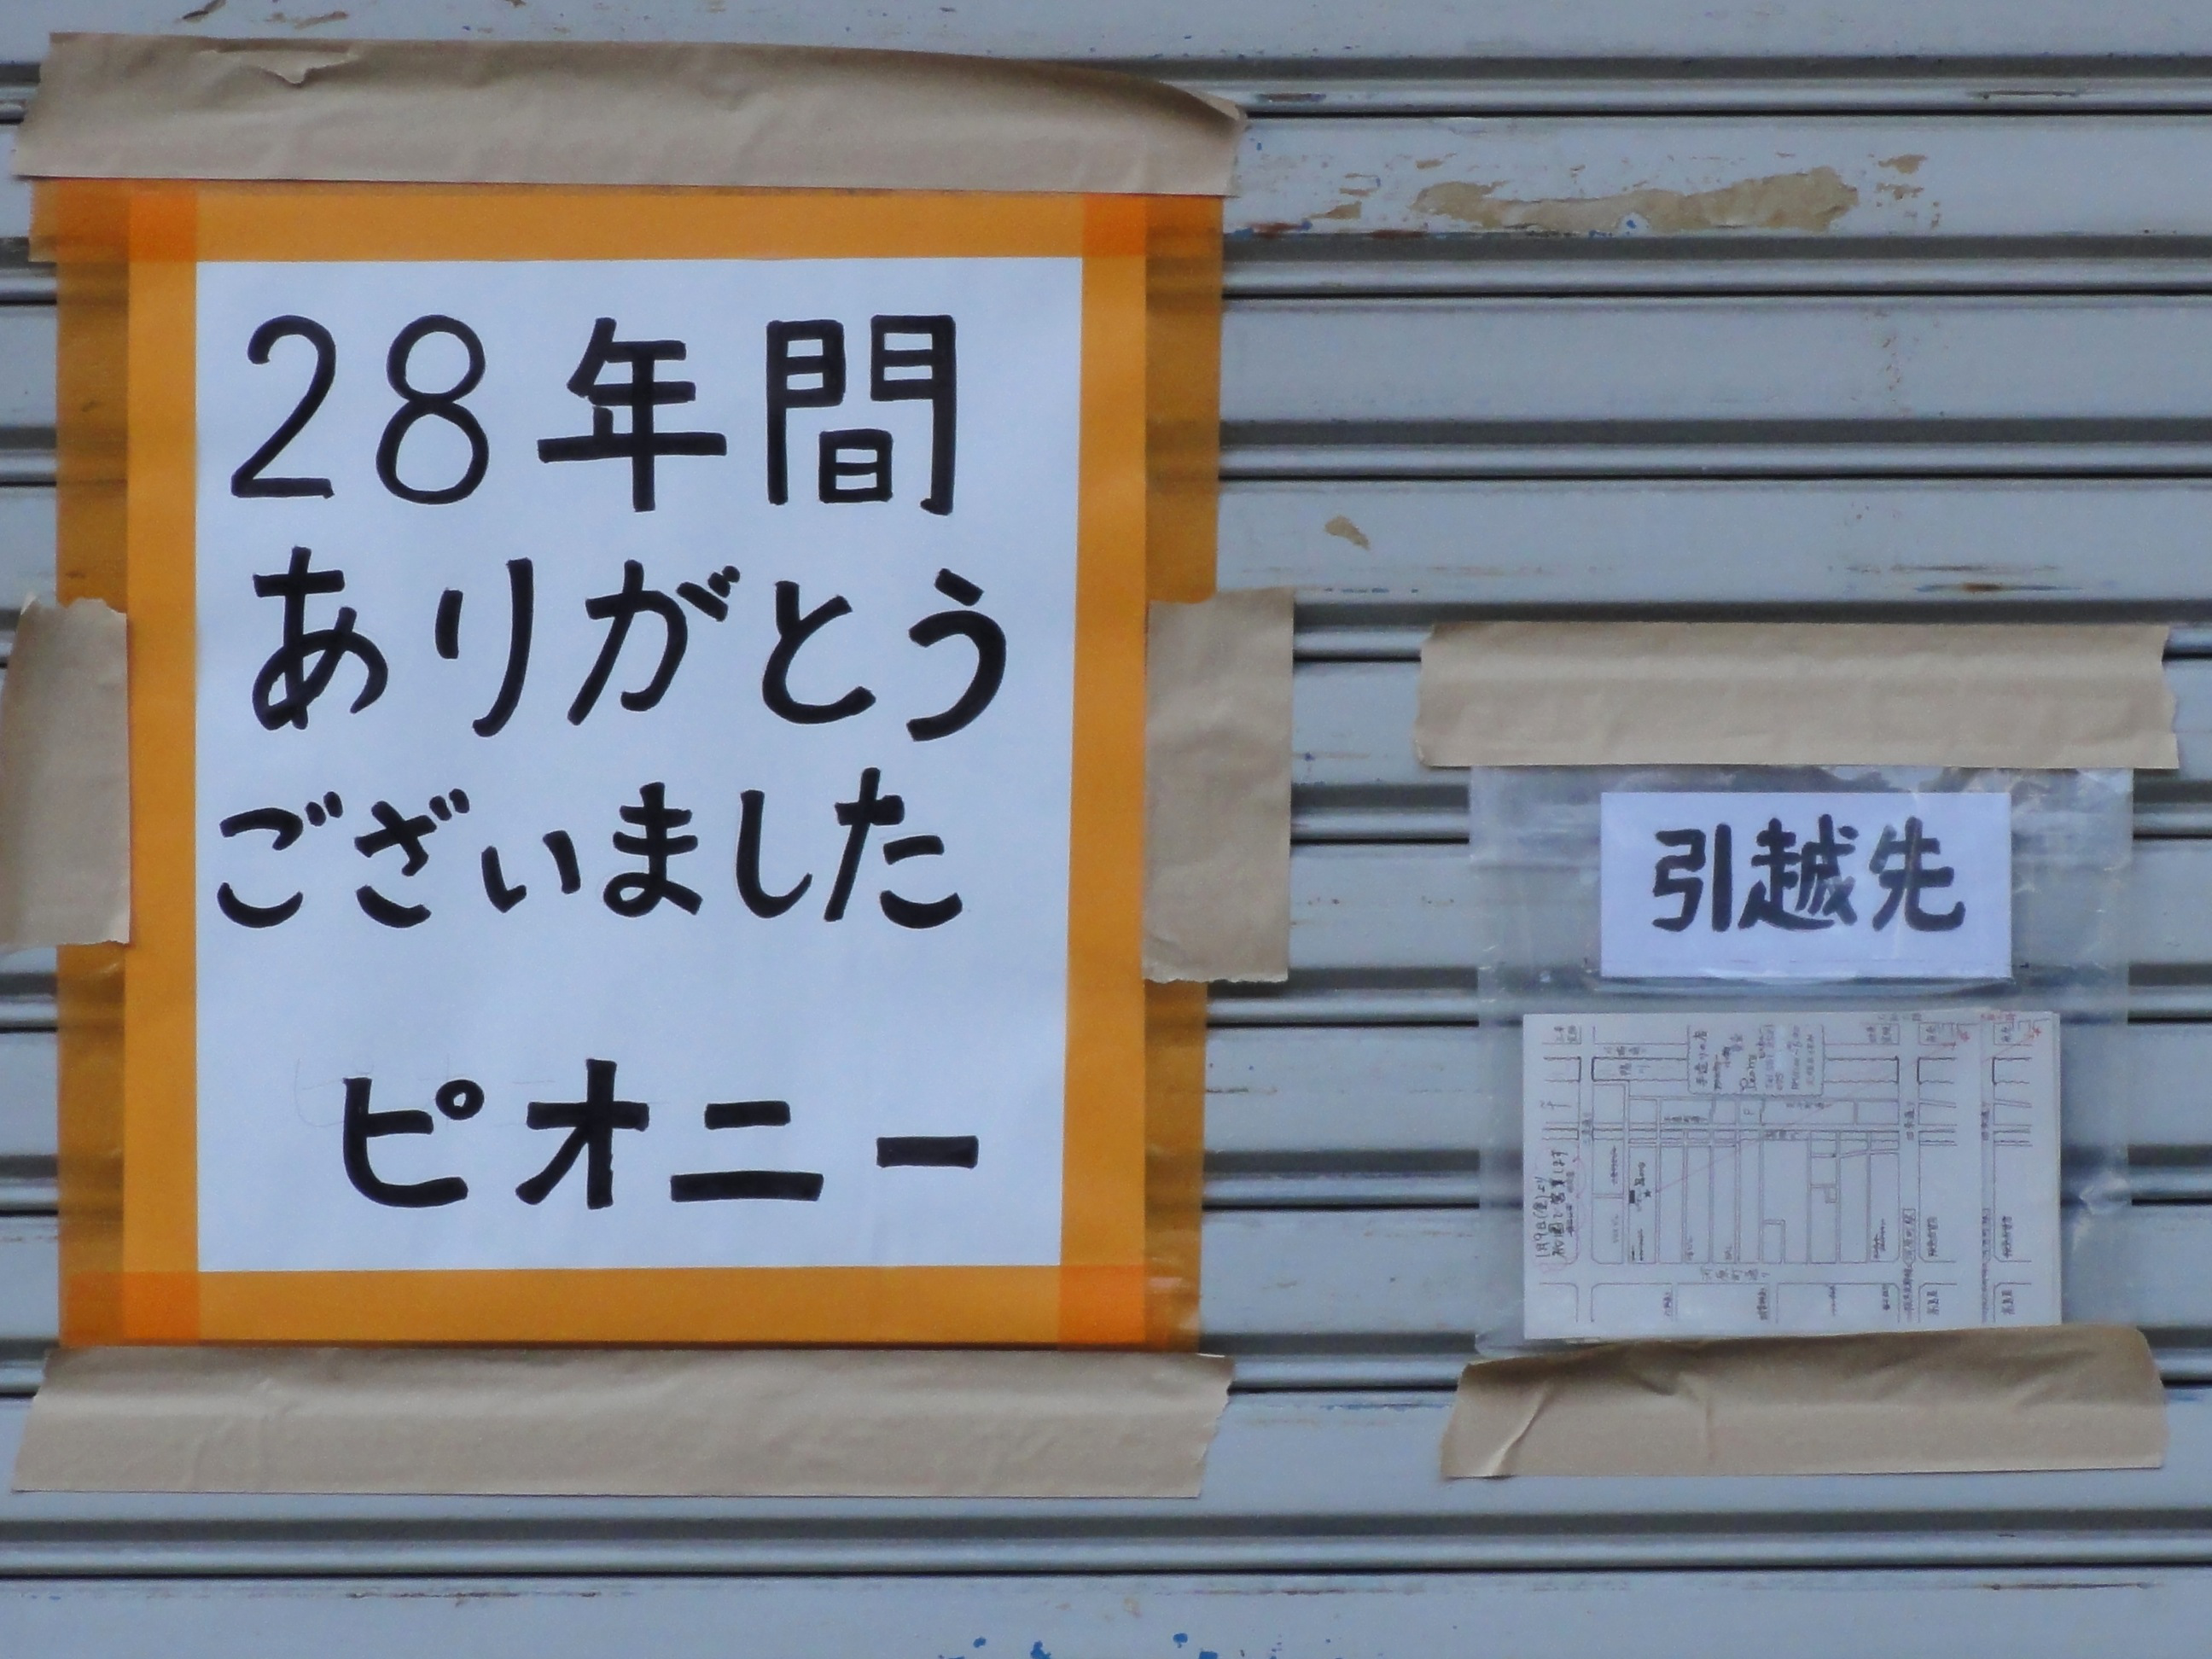

In [4]:
path_image = Path.cwd() / "images/002-kanban.jpg"
image = Image.open(path_image)
image

Let's try first with the default options of `image_to_data()`.

In [5]:
pytesseract.image_to_data(image)

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t2592\t1944\t-1\t\n2\t1\t1\t0\t0\t0\t782\t1753\t621\t3\t-1\t\n3\t1\t1\t1\t0\t0\t782\t1753\t621\t3\t-1\t\n4\t1\t1\t1\t1\t0\t782\t1753\t621\t3\t-1\t\n5\t1\t1\t1\t1\t1\t782\t1753\t621\t3\t95\t \n2\t1\t2\t0\t0\t0\t0\t0\t2592\t1877\t-1\t\n3\t1\t2\t1\t0\t0\t0\t0\t2592\t1877\t-1\t\n4\t1\t2\t1\t1\t0\t0\t0\t2592\t1877\t-1\t\n5\t1\t2\t1\t1\t1\t0\t0\t2592\t1877\t95\t \n'

We'd better `print()` it, since the returned string is formated. Besides, let's try `lang="jpn"`.

In [6]:
print(pytesseract.image_to_data(image, lang="jpn"))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2592	1944	-1	
2	1	1	0	0	0	782	1753	621	3	-1	
3	1	1	1	0	0	782	1753	621	3	-1	
4	1	1	1	1	0	782	1753	621	3	-1	
5	1	1	1	1	1	782	1753	621	3	95	 
2	1	2	0	0	0	0	0	2592	1877	-1	
3	1	2	1	0	0	0	0	2592	1877	-1	
4	1	2	1	1	0	0	0	2592	1877	-1	
5	1	2	1	1	1	0	0	2592	1877	95	 



We seem to have detected a bunch of bboxes, but no texts?

To be able to run the next cell, the current Python environment must have already installed `pandas`; in case not, please install it and restart the notebook.

In [7]:
pytesseract.image_to_data(image, lang="jpn", output_type="data.frame")

level  page_num  block_num  par_num  line_num  word_num  left   top  width  \
0      1         1          0        0         0         0     0     0   2592   
1      2         1          1        0         0         0   782  1753    621   
2      3         1          1        1         0         0   782  1753    621   
3      4         1          1        1         1         0   782  1753    621   
4      5         1          1        1         1         1   782  1753    621   
5      2         1          2        0         0         0     0     0   2592   
6      3         1          2        1         0         0     0     0   2592   
7      4         1          2        1         1         0     0     0   2592   
8      5         1          2        1         1         1     0     0   2592   

   height  conf text  
0    1944    -1  NaN  
1       3    -1  NaN  
2       3    -1  NaN  
3       3    -1  NaN  
4       3    95       
5    1877    -1  NaN  
6    1877    -1  NaN  
7    1877    -1  NaN  
8    1877    95

Using `DataFrame` makes everything clearer visually. But still<br>
**(?)** why no text has been detected?

### Try Other (Easier) Images

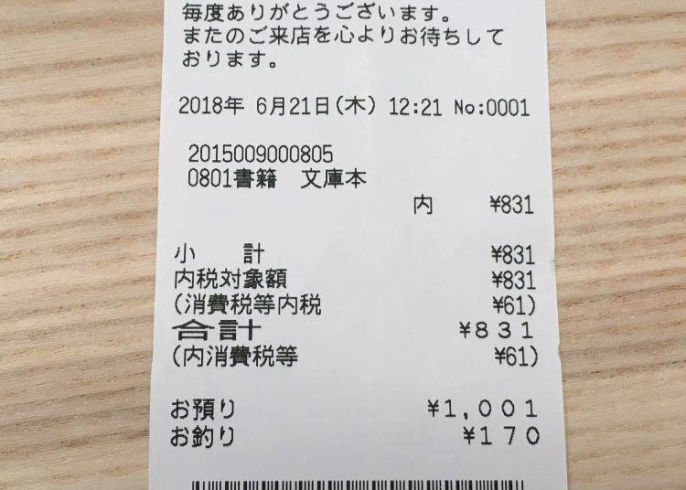

In [8]:
path_image = Path.cwd() / "images/000-receipt.jpg"
image = Image.open(path_image)
image

In [9]:
receipt_jpn_df = pytesseract.image_to_data(image, lang="jpn", output_type="data.frame")
receipt_jpn_df = receipt_jpn_df.dropna()
receipt_jpn_df

level  page_num  block_num  par_num  line_num  word_num  left  top  \
4        5         1          1        1         1         1   183    2   
5        5         1          1        1         1         2   236    0   
6        5         1          1        1         1         3   269    0   
7        5         1          1        1         1         4   286    0   
8        5         1          1        1         1         5   304    0   
..     ...       ...        ...      ...       ...       ...   ...  ...   
96       5         1          4        1         1         1   105  407   
97       5         1          4        1         1         2   463  426   
101      5         1          5        1         1         1   192  480   
102      5         1          5        1         1         2   444  480   
103      5         1          5        1         1         3   476  480   

     width  height  conf                       text  
4      265      20    96                         毎度  
5       46      30    96                         あり  
6       35      30    96                          が  
7       36      30    93                          と  
8       40      30    93                          う  
..     ...     ...   ...                        ...  
96     128      41    12                          8  
97      77      19    86                       \170  
101    245      10     0  TTPTTTTIUUTUUUUUUUIUUULUU  
102     23      10    33                         LU  
103     48      10    28                        UTU  

[77 rows x 12 columns]

Let's try with `lang="eng"` to see if the result degrades when the language is wrong.

In [10]:
receipt_eng_df = pytesseract.image_to_data(image, lang="eng", output_type="data.frame")
receipt_eng_df = receipt_jpn_df.dropna()
receipt_eng_df

level  page_num  block_num  par_num  line_num  word_num  left  top  \
4        5         1          1        1         1         1   183    2   
5        5         1          1        1         1         2   236    0   
6        5         1          1        1         1         3   269    0   
7        5         1          1        1         1         4   286    0   
8        5         1          1        1         1         5   304    0   
..     ...       ...        ...      ...       ...       ...   ...  ...   
96       5         1          4        1         1         1   105  407   
97       5         1          4        1         1         2   463  426   
101      5         1          5        1         1         1   192  480   
102      5         1          5        1         1         2   444  480   
103      5         1          5        1         1         3   476  480   

     width  height  conf                       text  
4      265      20    96                         毎度  
5       46      30    96                         あり  
6       35      30    96                          が  
7       36      30    93                          と  
8       40      30    93                          う  
..     ...     ...   ...                        ...  
96     128      41    12                          8  
97      77      19    86                       \170  
101    245      10     0  TTPTTTTIUUTUUUUUUUIUUULUU  
102     23      10    33                         LU  
103     48      10    28                        UTU  

[77 rows x 12 columns]

**(?)** Why `eng` does not degrade the result? There are still successful Japanese detection when `lang` is set to English.

In [11]:
# To see the available lang options
!ls /usr/share/tesseract/tessdata/

configs		 jpn.traineddata       pdf.ttf
eng.traineddata  jpn_vert.traineddata  tessconfigs


What if we try `jpg_vert`?

In [12]:
receipt_jpn_vert_df = pytesseract.image_to_data(image, lang="jpn_vert", output_type="data.frame")
receipt_jpn_vert_df = receipt_jpn_df.dropna()
receipt_jpn_vert_df

level  page_num  block_num  par_num  line_num  word_num  left  top  \
4        5         1          1        1         1         1   183    2   
5        5         1          1        1         1         2   236    0   
6        5         1          1        1         1         3   269    0   
7        5         1          1        1         1         4   286    0   
8        5         1          1        1         1         5   304    0   
..     ...       ...        ...      ...       ...       ...   ...  ...   
96       5         1          4        1         1         1   105  407   
97       5         1          4        1         1         2   463  426   
101      5         1          5        1         1         1   192  480   
102      5         1          5        1         1         2   444  480   
103      5         1          5        1         1         3   476  480   

     width  height  conf                       text  
4      265      20    96                         毎度  
5       46      30    96                         あり  
6       35      30    96                          が  
7       36      30    93                          と  
8       40      30    93                          う  
..     ...     ...   ...                        ...  
96     128      41    12                          8  
97      77      19    86                       \170  
101    245      10     0  TTPTTTTIUUTUUUUUUUIUUULUU  
102     23      10    33                         LU  
103     48      10    28                        UTU  

[77 rows x 12 columns]

## More
Once obtaining this, we can do, e.g.

- drawing bboxes with `ImageDraw` from `PIL`
- Putting detected texts on the image
- etc.

We will demo one way to draw bboxes, with top left corner marked with a diff color.

In [13]:
receipt_jpn_df = receipt_jpn_df.assign(
    bottom = lambda x: x.top + x.height,
    right = lambda x: x.left + x.width,
)
receipt_jpn_df.head()

level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
4      5         1          1        1         1         1   183    2    265   
5      5         1          1        1         1         2   236    0     46   
6      5         1          1        1         1         3   269    0     35   
7      5         1          1        1         1         4   286    0     36   
8      5         1          1        1         1         5   304    0     40   

   height  conf text  bottom  right  
4      20    96   毎度      22    448  
5      30    96   あり      30    282  
6      30    96    が      30    304  
7      30    93    と      30    322  
8      30    93    う      30    344

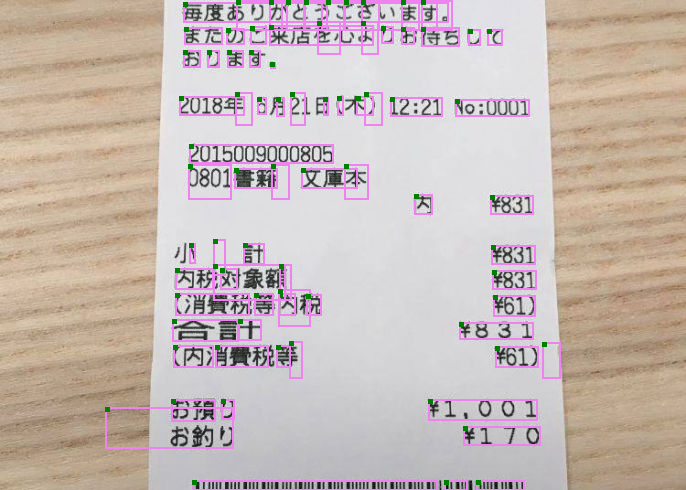

In [14]:
from PIL import ImageDraw
from itertools import product

draw = ImageDraw.Draw(image)

for row in receipt_jpn_df.itertuples():
    bbox = [row.left, row.top, row.right, row.bottom]
    draw.rectangle(
        bbox,
        outline="violet",
        width=2,
    )

    # naive
    #draw.point([(row.left, row.top)], fill="green")

    # more sophisticated
    n_px = 5
    draw.point(
        [(row.left+i, row.top+j) for i, j in product(range(n_px), range(n_px))],
        fill="green",
    )

image